# 1.3 DW - Enrequcimiento

En esta etapa trabajaremos algunas variables que en las etapas anteriores detectamos a trabajar para transformar los datos.

## Import libraries

In [195]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [197]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.analysis_univariate import count_plot_percentage
from src.utils.statistics import calculate_frequency_values
from src.visualization.word_cloud import words_cloud

## Set up

In [198]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

In [199]:
# Definimos el constantes de colores de acuerdo al negocio para usar en los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR_VINO_BLANCO = "#ffffbf"

## Read Data

In [200]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINE_CSV_PATH = data_dir("processed", "df_wine_merged.csv")

WINE_CSV_PATH

WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/processed/df_wine_merged.csv')

In [201]:
# Leemos los csv's y los guardamos en un dataframe
df_wine = pd.read_csv(WINE_CSV_PATH)

# Problema de multiclase

En la etapa del descubrimiento detectamos que la variable `quality` es una variable que tiene muchas clases, y que al ser esta nuestra variable target tendriamos problemas de overfiting si entrenamos un problema de clasificacion multiclase con la cantidad de datos que tenemos, que es poca. Por eso el mejor abordaje que podemos hacer es agrupar los datos para identificar solamente dos clases, 'low' y 'high'. Como al cliente le interesa que determinar los vinos de alta calidad para exportar, con este cambio seguiriamos cumpliendo con el objetivo de identificar los vinos de alta calidad.

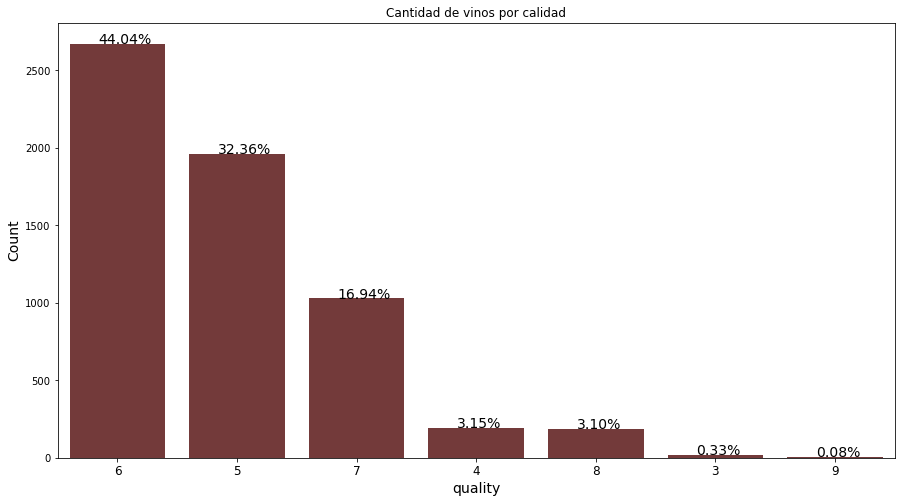

In [202]:
count_plot_percentage(df_wine, 'quality', 'Cantidad de vinos por calidad')

La mayor cantidad de datos esta concentrada en los qualities 6 y 5. Como quality es categorica ordinal, por lo que agrupar sin tener este "orden" en cuenta no es un criterio adecuado. Intetaremos agrupar los datos lo mas balanceado posible. 

Los nuevos valores de quality son:

- q_low : 3, 4 y 5
- q_high : 6, 7 , 8, 9

In [203]:
# Cambiamos los valores de los index en index_low con el valor "low"

df_wine['quality'] = df_wine['quality'].map({3:'low', 4:'low', 5:'low', 6:'high', 7:'high', 8:'high', 9:'high'})

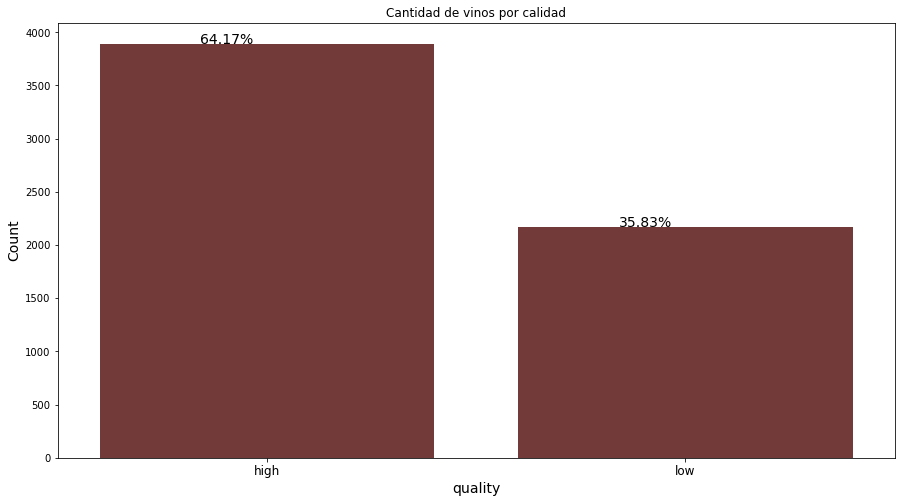

In [204]:
count_plot_percentage(df_wine, 'quality', 'Cantidad de vinos por calidad')

Nos quedan dos clases, una para los vinos de baja calidad y otra para los de alta calidad. Convertimos un problema de multiclase a un problema de clasificacion binaria. La distribución actual de los datos nos deja un problema de desbalanceo que luego trataremos.

# Problema de cardinalidad

Trataremos las variables con alta cardinalidad para ver si podemos reducirla.

In [205]:
# Cardinalidad de las columnas categoricas
df_wine_object = df_wine.select_dtypes(include=['object'])
cardinalidad = pd.DataFrame({'Cantidad' : df_wine_object.nunique(), 'Porcentaje' : ((df_wine_object.nunique()) * 100) / (df_wine_object.shape[0]) })
cardinalidad

,Cantidad,Porcentaje
quality,2,0.032965
style,2,0.032965
winery,395,6.510631
wine,677,11.158728
region,63,1.038404
type,21,0.346135


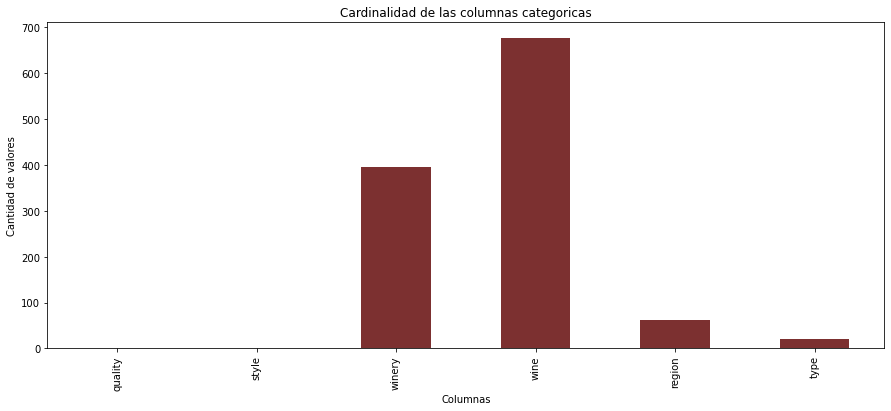

In [206]:
plt.figure(figsize=(15,6))
cardinalidad.Cantidad.plot(kind='bar',color=COLOR_VINO_TINTO)
plt.title('Cardinalidad de las columnas categoricas')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores')
plt.show()

## winery

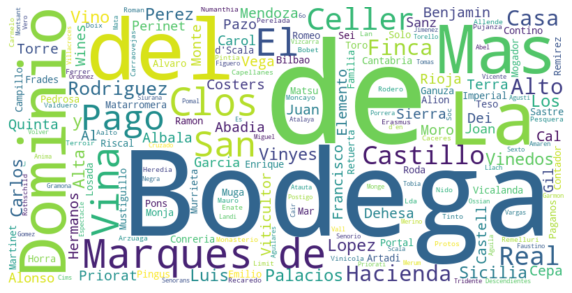

In [207]:
words_cloud(df_wine.winery.value_counts().index.tolist())

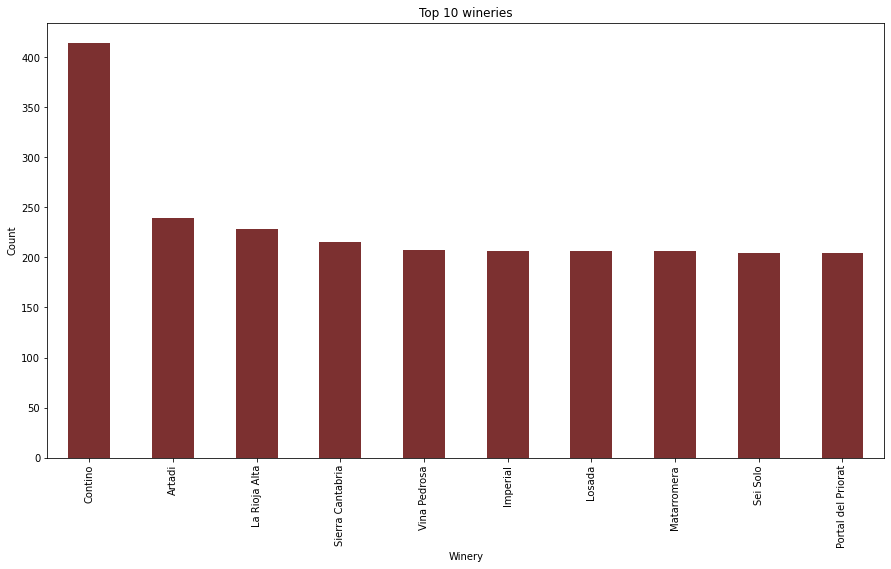

In [208]:
# Mostramos el top 10 de wineries
plt.figure(figsize=(15,8))
df_wine.winery.value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color=COLOR_VINO_TINTO)
plt.title('Top 10 wineries')
plt.xlabel('Winery')
plt.ylabel('Count')
plt.show()

In [209]:
# Calculamos la frecuencia de los valores de la columna winery
df_winery_freq_values = calculate_frequency_values(df_wine, 'winery')
df_winery_freq_values

,porcentaje,porcentaje_acumulado
Contino,6.8,6.8
Artadi,3.9,10.7
La Rioja Alta,3.8,14.5
Sierra Cantabria,3.5,18.0
Vina Pedrosa,3.4,21.4
...,...,...
Jesus Madrazo,0.0,94.0
Marco Abella,0.0,94.0
Sara Perez y Rene Barbier,0.0,94.0
Bodega Elias Mora,0.0,94.0


In [210]:
# Vemos si podemos agrupar los valores de la columna winery para reducir los valores unicos
for umbral_acumulado in [70,80,90]:
    cantidad_valores = df_winery_freq_values[df_winery_freq_values['porcentaje_acumulado'] < umbral_acumulado].shape[0]
    print(f'Cantidad de valores unicos: que se acumulan en un {umbral_acumulado}% es {cantidad_valores} ')

Cantidad de valores unicos: que se acumulan en un 70% es 19 
Cantidad de valores unicos: que se acumulan en un 80% es 29 
Cantidad de valores unicos: que se acumulan en un 90% es 89 


Vemos los datos sigue altamente distribuidos para el 70%, 80% y 90% por lo que una estrategia de reduccion de valores no sería conveniente. Procedemos a eliminar la columna winery.

In [211]:
# eliminamos la columa winery
df_wine.drop(['winery'], axis=1, inplace=True)

## wine

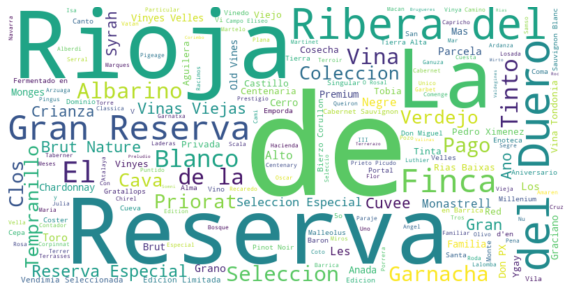

In [212]:
words_cloud(df_wine.wine.value_counts().index.tolist())

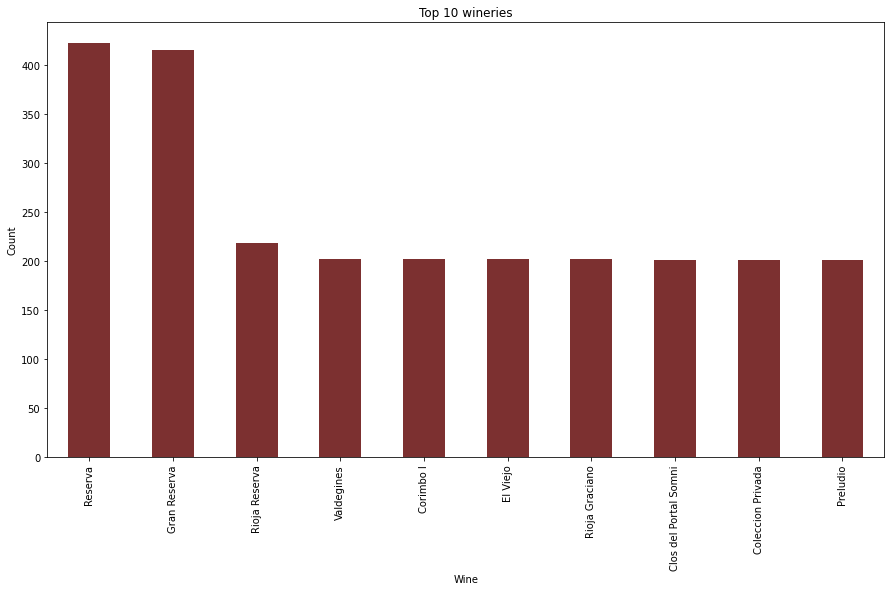

In [213]:
# Mostramos el top 10 de wines
plt.figure(figsize=(15,8))
df_wine.wine.value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color=COLOR_VINO_TINTO)
plt.title('Top 10 wineries')
plt.xlabel('Wine')
plt.ylabel('Count')
plt.show()

In [214]:
# Calculamos la frecuencia de los valores de |la columna wine
df_wine_freq_values = calculate_frequency_values(df_wine, 'wine')
df_wine_freq_values

,porcentaje,porcentaje_acumulado
Reserva,7.0,7.0
Gran Reserva,6.8,13.8
Rioja Reserva,3.6,17.4
Mirto,3.3,20.7
Les Brugueres,3.3,24.0
...,...,...
Laurel,0.0,87.8
Clos del Portal Negre de Negres,0.0,87.8
Vatan Tinta de Toro,0.0,87.8
Respeto,0.0,87.8


In [215]:
# Vemos si podemos agrupar los valores de la columna wine para reducir los valores unicos
for umbral_acumulado in [70,80,90]:
    cantidad_valores = df_wine_freq_values[df_wine_freq_values['porcentaje_acumulado'] < umbral_acumulado].shape[0]
    print(f'Cantidad de valores unicos: que se acumulan en un {umbral_acumulado}% es {cantidad_valores} ')

Cantidad de valores unicos: que se acumulan en un 70% es 18 
Cantidad de valores unicos: que se acumulan en un 80% es 44 
Cantidad de valores unicos: que se acumulan en un 90% es 677 


Vemos los datos sigue altamente distribuidos para el 70%, 80% y 90% por lo que una estrategia de reduccion de valores no sería conveniente. Procedemos a eliminar la columna wine.

In [216]:
# eliminamos la columa wine
df_wine.drop(['wine'], axis=1, inplace=True)

## Region

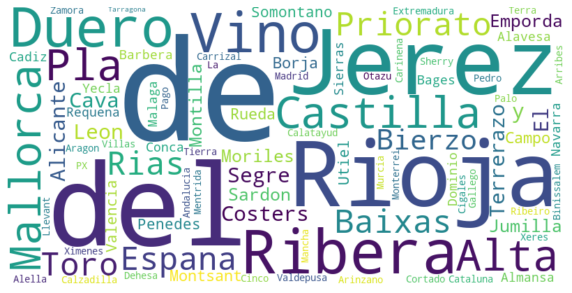

In [217]:
words_cloud(df_wine.region.value_counts().index.tolist())

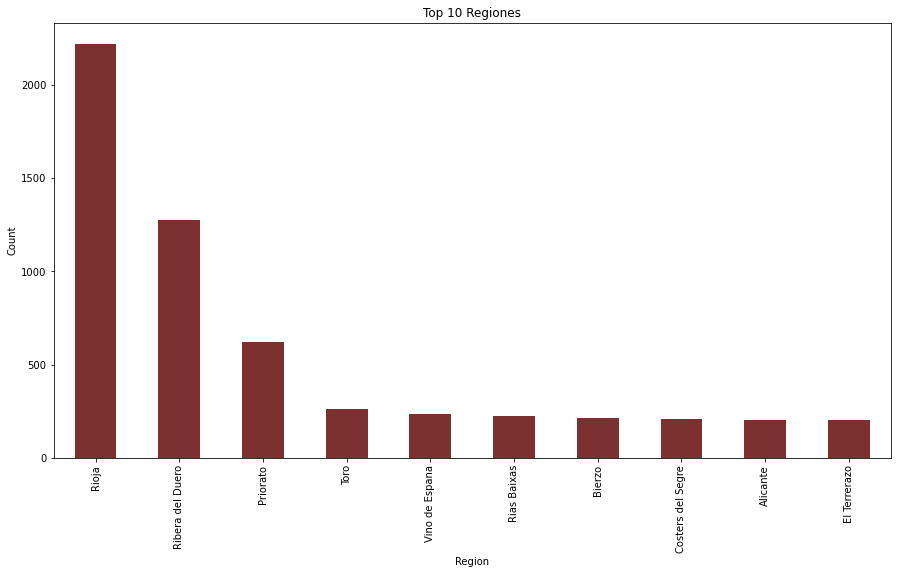

In [218]:
# Mostramos el top 10 de regiones
plt.figure(figsize=(15,8))
df_wine.region.value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color=COLOR_VINO_TINTO)
plt.title('Top 10 Regiones')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [219]:
# Calculamos la frecuencia de los valores de la columna region
df_region_freq_values = calculate_frequency_values(df_wine, 'region')
df_region_freq_values

,porcentaje,porcentaje_acumulado
Rioja,36.6,36.6
Ribera del Duero,21.0,57.6
Priorato,10.3,67.9
Toro,4.4,72.3
Vino de Espana,3.9,76.2
...,...,...
Mentrida,0.0,99.2
Dehesa del Carrizal,0.0,99.2
Madrid,0.0,99.2
Carinena,0.0,99.2


In [220]:
# Vemos si podemos agrupar los valores de la columna region para reducir los valores unicos
for umbral_acumulado in [70,80,90]:
    cantidad_valores = df_region_freq_values[df_region_freq_values['porcentaje_acumulado'] < umbral_acumulado].shape[0]
    print(f'Cantidad de valores unicos: que se acumulan en un {umbral_acumulado}% es {cantidad_valores} ')

Cantidad de valores unicos: que se acumulan en un 70% es 3 
Cantidad de valores unicos: que se acumulan en un 80% es 6 
Cantidad de valores unicos: que se acumulan en un 90% es 8 


En este caso podremos agrupar los datos de region conservando el 80% de los datos con las categorias correspondientes y el resto de datos con una categoria generica.

In [221]:
values_region_to_keep = df_region_freq_values[df_region_freq_values['porcentaje_acumulado'] < 80].index.tolist()
values_region_to_keep

['Rioja',
 'Ribera del Duero',
 'Priorato',
 'Toro',
 'Vino de Espana',
 'Rias Baixas']

In [222]:
# buscamos los indices de los valores que en 'region' no tenemos en 'values_region_to_keep'
df_wine['region'].isin(values_region_to_keep)
indices_region_to_agrupate = df_wine[df_wine['region'].isin(values_region_to_keep)==False].index.tolist()
# buscar 'Rioja' y 'Ribera del Duero'
print(f"hay {len(indices_region_to_agrupate)} regitros que tienen valores de regiones vamos a agrupar que representan {round(len(indices_region_to_agrupate)/df_wine.shape[0]* 100)}% de los valores")


hay 1221 regitros que tienen valores de regiones vamos a agrupar que representan 20% de los valores


In [223]:
# Cambiamos los valores de la columna region 
df_wine.loc[indices_region_to_agrupate, 'region'] = 'Otras'

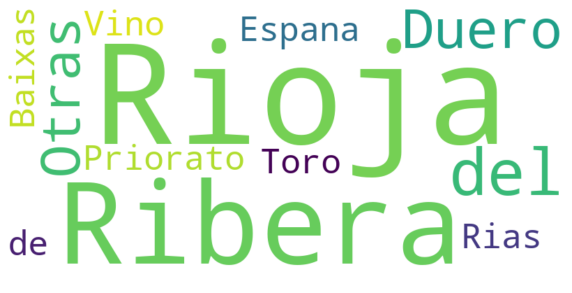

In [224]:
words_cloud(df_wine.region.value_counts().index.tolist())

In [225]:
# Calculamos la frecuencia de los valores de la columna region
df_region_freq_values = calculate_frequency_values(df_wine, 'region')
df_region_freq_values

,porcentaje,porcentaje_acumulado
Rioja,36.6,36.6
Ribera del Duero,21.0,57.6
Otras,20.1,77.7
Priorato,10.3,88.0
Toro,4.4,92.4
Vino de Espana,3.9,96.3
Rias Baixas,3.7,100.0


## type

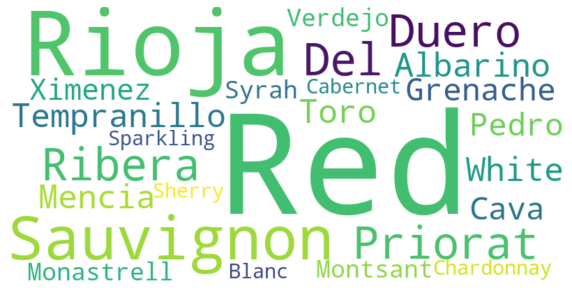

In [226]:
words_cloud(df_wine.type.value_counts().index.tolist())

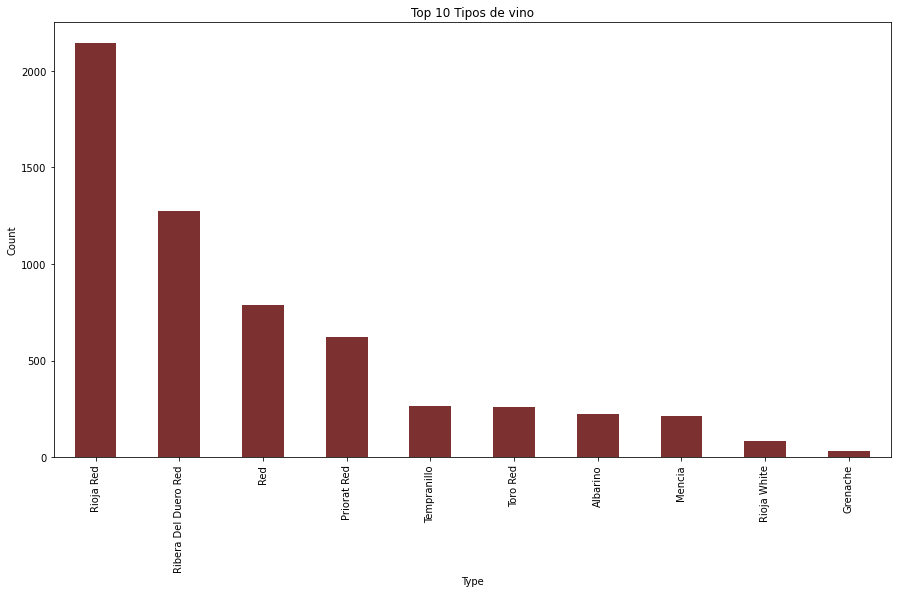

In [227]:
# Mostramos el top 10 de type
plt.figure(figsize=(15,8))
df_wine.type.value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color=COLOR_VINO_TINTO)
plt.title('Top 10 Tipos de vino')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [228]:
# Calculamos la frecuencia de los valores de la columna type
df_type_freq_values = calculate_frequency_values(df_wine, 'type')
df_type_freq_values

,porcentaje,porcentaje_acumulado
Rioja Red,35.3,35.3
Ribera Del Duero Red,21.0,56.3
Red,13.0,69.3
Priorat Red,10.2,79.5
Tempranillo,4.4,83.9
Toro Red,4.3,88.2
Albarino,3.7,91.9
Mencia,3.5,95.4
Rioja White,1.4,96.8
Cava,0.5,97.3


In [229]:
# Vemos si podemos agrupar los valores de la columna type para reducir los valores unicos
for umbral_acumulado in [70,80,90]:
    cantidad_valores = df_type_freq_values[df_type_freq_values['porcentaje_acumulado'] < umbral_acumulado].shape[0]
    print(f'Cantidad de valores unicos: que se acumulan en un {umbral_acumulado}% es {cantidad_valores} ')

Cantidad de valores unicos: que se acumulan en un 70% es 3 
Cantidad de valores unicos: que se acumulan en un 80% es 4 
Cantidad de valores unicos: que se acumulan en un 90% es 6 


En este caso podremos agrupar los datos de type conservando el 90% de los datos con las categorias correspondientes y el resto de datos con una categoria generica.

In [230]:
values_type_to_keep = df_type_freq_values[df_type_freq_values['porcentaje_acumulado'] < 90].index.tolist()
values_type_to_keep

['Rioja Red',
 'Ribera Del Duero Red',
 'Red',
 'Priorat Red',
 'Tempranillo',
 'Toro Red']

In [231]:
# buscamos los indices de los valores que en 'type' no tenemos en 'values_type_to_keep'
df_wine['type'].isin(values_type_to_keep)
indices_type_to_agrupate = df_wine[df_wine['type'].isin(values_type_to_keep)==False].index.tolist()
# buscar 'Rioja' y 'Ribera del Duero'
print(f"hay {len(indices_type_to_agrupate)} regitros que tienen valores de type vamos a agrupar que representan {round(len(indices_type_to_agrupate)/df_wine.shape[0]* 100)}% de los valores")


hay 716 regitros que tienen valores de type vamos a agrupar que representan 12% de los valores


In [232]:
# Cambiamos los valores de la columna type 
df_wine.loc[indices_type_to_agrupate, 'type'] = 'Otras'

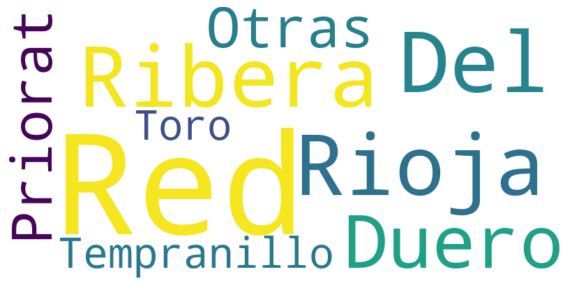

In [233]:
words_cloud(df_wine.type.value_counts().index.tolist())

In [234]:
# Calculamos la frecuencia de los valores de la columna type
df_type_freq_values = calculate_frequency_values(df_wine, 'type')
df_type_freq_values

,porcentaje,porcentaje_acumulado
Rioja Red,35.3,35.3
Ribera Del Duero Red,21.0,56.3
Red,13.0,69.3
Otras,11.8,81.1
Priorat Red,10.2,91.3
Tempranillo,4.4,95.7
Toro Red,4.3,100.0


In [239]:
# Cardinalidad de las columnas categoricas
df_wine_object = df_wine.select_dtypes(include=['object'])
cardinalidad = pd.DataFrame({'Cantidad' : df_wine_object.nunique(), 'Porcentaje' : ((df_wine_object.nunique()) * 100) / (df_wine_object.shape[0]) })
cardinalidad

,Cantidad,Porcentaje
quality,2,0.032965
style,2,0.032965
region,7,0.115378
type,7,0.115378


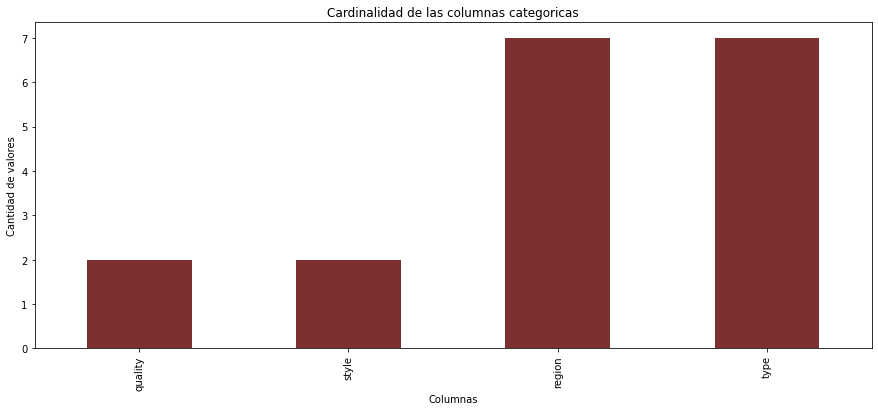

In [236]:
plt.figure(figsize=(15,6))
cardinalidad.Cantidad.plot(kind='bar',color=COLOR_VINO_TINTO)
plt.title('Cardinalidad de las columnas categoricas')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores')
plt.show()

Reducimos el problema de cardinalidad de las variables type y region.

In [240]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6067 entries, 0 to 6066
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6067 non-null   float64
 1   volatile_acidity      6067 non-null   float64
 2   citric_acid           6067 non-null   float64
 3   residual_sugar        6067 non-null   float64
 4   chlorides             6067 non-null   float64
 5   free_sulfur_dioxide   6067 non-null   float64
 6   total_sulfur_dioxide  6067 non-null   float64
 7   density               6067 non-null   float64
 8   pH                    6067 non-null   float64
 9   sulphates             6067 non-null   float64
 10  alcohol               6067 non-null   float64
 11  quality               6067 non-null   object 
 12  style                 6067 non-null   object 
 13  year                  6067 non-null   int64  
 14  rating                6067 non-null   int64  
 15  num_reviews          

In [241]:
# Por ultimo guardamos el dataframe en un archivo csv
WINE_ENRICHED_CSV_PATH = data_dir("processed", "df_wine_enriched.csv")
df_wine.to_csv(WINE_ENRICHED_CSV_PATH, index=False)
